In [ ]:
!git clone https://github.com/IlfGauhnith/UFRPE_ML.git

Cloning into 'UFRPE_ML'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 1), reused 7 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 483.08 KiB | 4.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [76]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/UFRPE_ML/naive bayes/risco_credito.csv")

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


Exemplificando o cálculo das probabilidades priori.

In [73]:
prior = {
    "alto": len(df[df["risco"] == "alto"]) / len(df),
    "moderado": len(df[df["risco"] == "moderado"]) / len(df),
    "baixo": len(df[df["risco"] == "baixo"]) / len(df)
}

prior

{'alto': 0.42857142857142855,
 'moderado': 0.21428571428571427,
 'baixo': 0.35714285714285715}

Generalizando para todas as colunas

In [74]:
likelihood = dict()

for risco in df["risco"].unique():
  likelihood[risco] = dict()

  for column in df.columns.tolist()[:-1]:
    likelihood[risco][column] = dict()

    for unique_value in df[column].unique():
      ocorrunce = len(df[ df["risco"] == risco ][ df[ df["risco"] == risco ] [column] == unique_value])
      likelihood[risco][column][unique_value] = ocorrunce / len(df[ df["risco"] == risco])

In [77]:
import pprint

pprint.PrettyPrinter(width=20).pprint(likelihood)

{'alto': {'divida': {'alta': 0.6666666666666666,
                     'baixa': 0.3333333333333333},
          'garantias': {'adequada': 0.0,
                        'nenhuma': 1.0},
          'historia': {'boa': 0.16666666666666666,
                       'desconhecida': 0.3333333333333333,
                       'ruim': 0.5},
          'renda': {'0_15': 0.5,
                    '15_35': 0.3333333333333333,
                    'acima_35': 0.16666666666666666}},
 'baixo': {'divida': {'alta': 0.4,
                      'baixa': 0.6},
           'garantias': {'adequada': 0.4,
                         'nenhuma': 0.6},
           'historia': {'boa': 0.6,
                        'desconhecida': 0.4,
                        'ruim': 0.0},
           'renda': {'0_15': 0.0,
                     '15_35': 0.0,
                     'acima_35': 1.0}},
 'moderado': {'divida': {'alta': 0.3333333333333333,
                         'baixa': 0.6666666666666666},
              'garantias': {'adequada': 0.

Vamos calcular a predição do risco para um caso onde  


*   historia: boa
*   divida: alta
*   garantias: nenhuma
*   renda: acima_35

Lembrando a fórmula:  
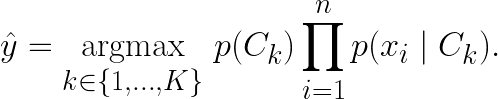

In [97]:
posteriori = dict()

for risco in df["risco"].unique():
  p_prior = prior[risco]
  p_likelihood_historia = likelihood[risco]["historia"]["boa"]
  p_likelihood_divida = likelihood[risco]["divida"]["alta"]
  p_likelihood_garantias = likelihood[risco]["garantias"]["nenhuma"]
  p_likelihood_renda = likelihood[risco]["renda"]["acima_35"]

  posteriori[risco] = p_prior * p_likelihood_historia * p_likelihood_divida * p_likelihood_garantias * p_likelihood_renda * p_prior

pprint.PrettyPrinter(width=20).pprint(posteriori)
max(posteriori, key=posteriori.get)

{'alto': 0.0034013605442176865,
 'baixo': 0.018367346938775512,
 'moderado': 0.0011337868480725622}


'baixo'

# Calcule você mesmo a predição!

Vamos calcular a predição do risco para um caso onde  


*   historia: <>
*   divida: <>
*   garantias: <>
*   renda: <>